# Neural Network with Keras

We have made a lot of effort to program our neural network that is able to classify differenr handwritten number with the help of numpy. A lot of other people did that already and since this is the basis for many applications nowadays, a large number of API (application programming interfaces) exist. Python plays therby a leading role. 
We will use in the follwing the interface provided by the `keras` module. `keras` is actually sitting on top of the real machine learning API, which is in our case `tensorflow`. `keras` makes the use of tensorflow a bit more friendly and from the example below, you wil recognize by how much shorter our code gets with the keras and tensorflow API.

In [31]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model

from keras import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 18,
                     'axes.titlesize': 20,
                     'axes.labelsize': 20,
                     'axes.labelpad': 1,
                     'lines.linewidth': 2,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'
                    })

## MNIST Data Set (Keras)

This loads the same data as in our previous notebook, except that the function to do that is directly provided by `keras`.

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

# one-hot encoding
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

## Build the model

The next few lines create the whole neural network with an input layer, a hidden layer with 64 neurons and and output layer with 10 neurons.

In [33]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(28 * 28, )),
    Dense(10, activation='softmax')
])

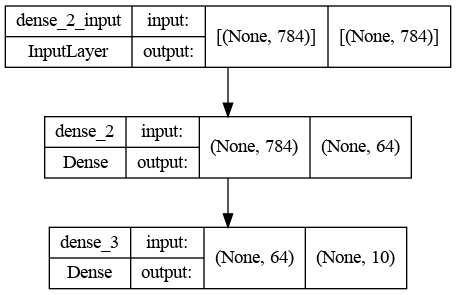

In [34]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

## Compile the model

The `compile` method assembles everything to create a model for training. You can specify here the stochastic gradient descent method in the same way as the loss function.

In [35]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Finally, the `fit` method allows us to train the model for a specified number of epochs.

In [36]:
model.fit(x_train, y_train, epochs=20)

2024-07-02 06:42:01.092746: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
1875/1875 [==============================] - 2s 805us/step - loss: 1.5565 - accuracy: 0.6634
Epoch 2/20
1875/1875 [==============================] - 2s 813us/step - loss: 0.7775 - accuracy: 0.8414
Epoch 3/20
1875/1875 [==============================] - 1s 573us/step - loss: 0.5627 - accuracy: 0.8687
Epoch 4/20
1875/1875 [==============================] - 1s 573us/step - loss: 0.4732 - accuracy: 0.8817
Epoch 5/20
1875/1875 [==============================] - 1s 634us/step - loss: 0.4237 - accuracy: 0.8890
Epoch 6/20
1875/1875 [==============================] - 1s 621us/step - loss: 0.3920 - accuracy: 0.8945
Epoch 7/20
1875/1875 [==============================] - 1s 665us/step - loss: 0.3694 - accuracy: 0.8991
Epoch 8/20
1875/1875 [==============================] - 1s 669us/step - loss: 0.3522 - accuracy: 0.9028
Epoch 9/20
1875/1875 [==============================] - 1s 665us/step - loss: 0.3387 - accuracy: 0.9055
Epoch 10/20
1875/1875 [==============================] - 1s 663u

## Testing the model

We may now use our trained model to predict the number in the image with the `model.predict` function. This delivers an array of 10 numbers, which represent the confidences that the number $0,\ldots,9$ are contained. The index of the biggest number thus represents the number contained in the image.

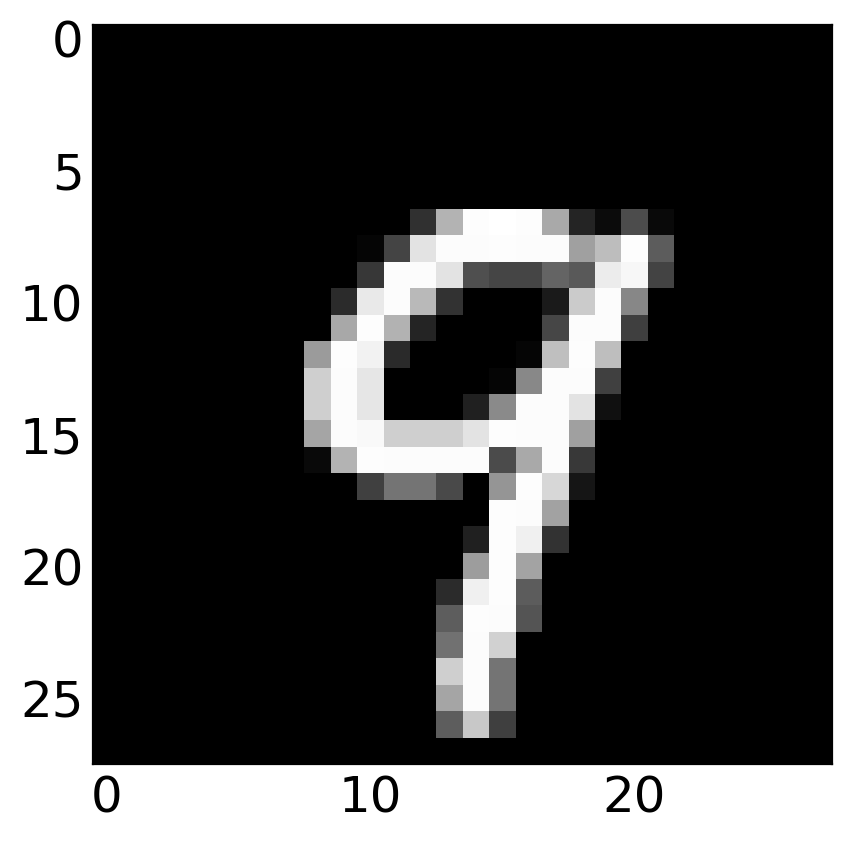

In [37]:
i = 12
plt.imshow(x_test[i,:].reshape(28,28), cmap='gray')
plt.show()

In [38]:
model.predict(x_test[i,:].reshape(1,784))

array([[7.1246905e-05, 1.8826446e-05, 2.5357914e-04, 6.1357114e-04,
        2.2916988e-02, 6.8956125e-04, 4.3461991e-05, 2.1728536e-02,
        1.9466790e-03, 9.5171756e-01]], dtype=float32)

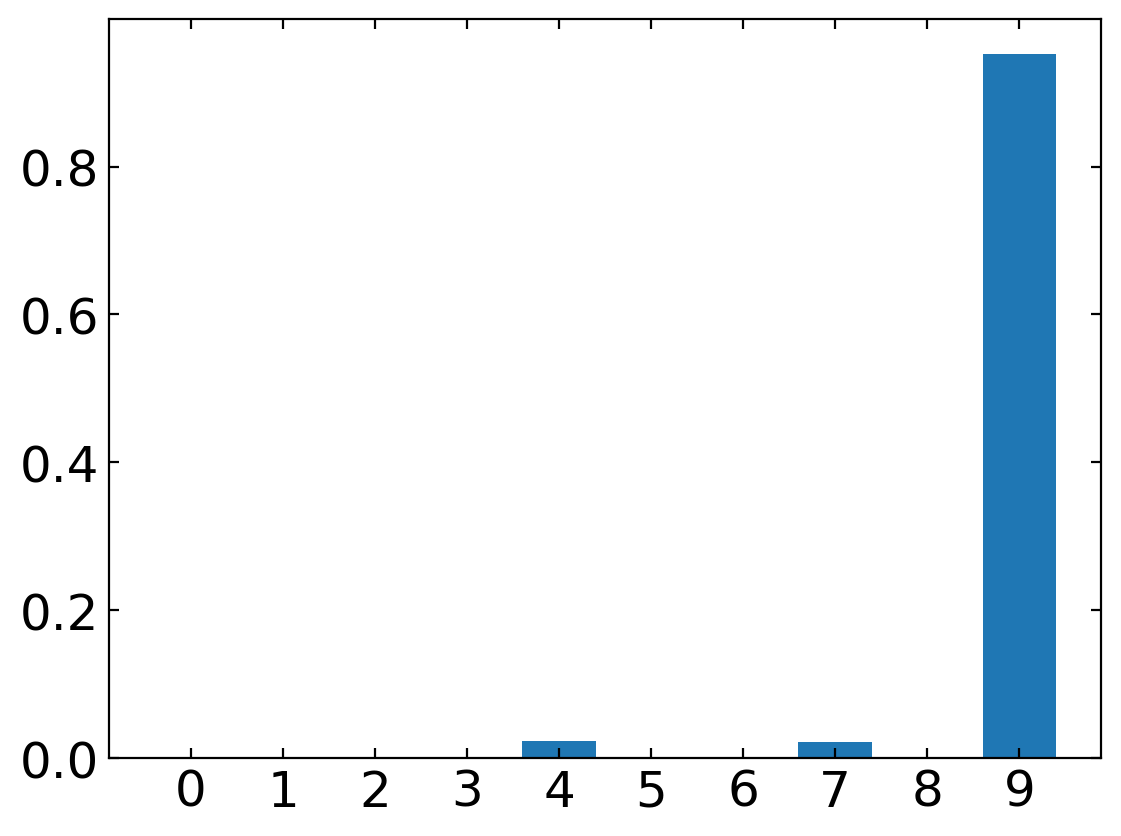

In [39]:
plt.bar( list(range(0,10)), model.predict(x_test[i,:].reshape(1,784))[0] )
plt.xticks( list(range(0,10)))
plt.show()

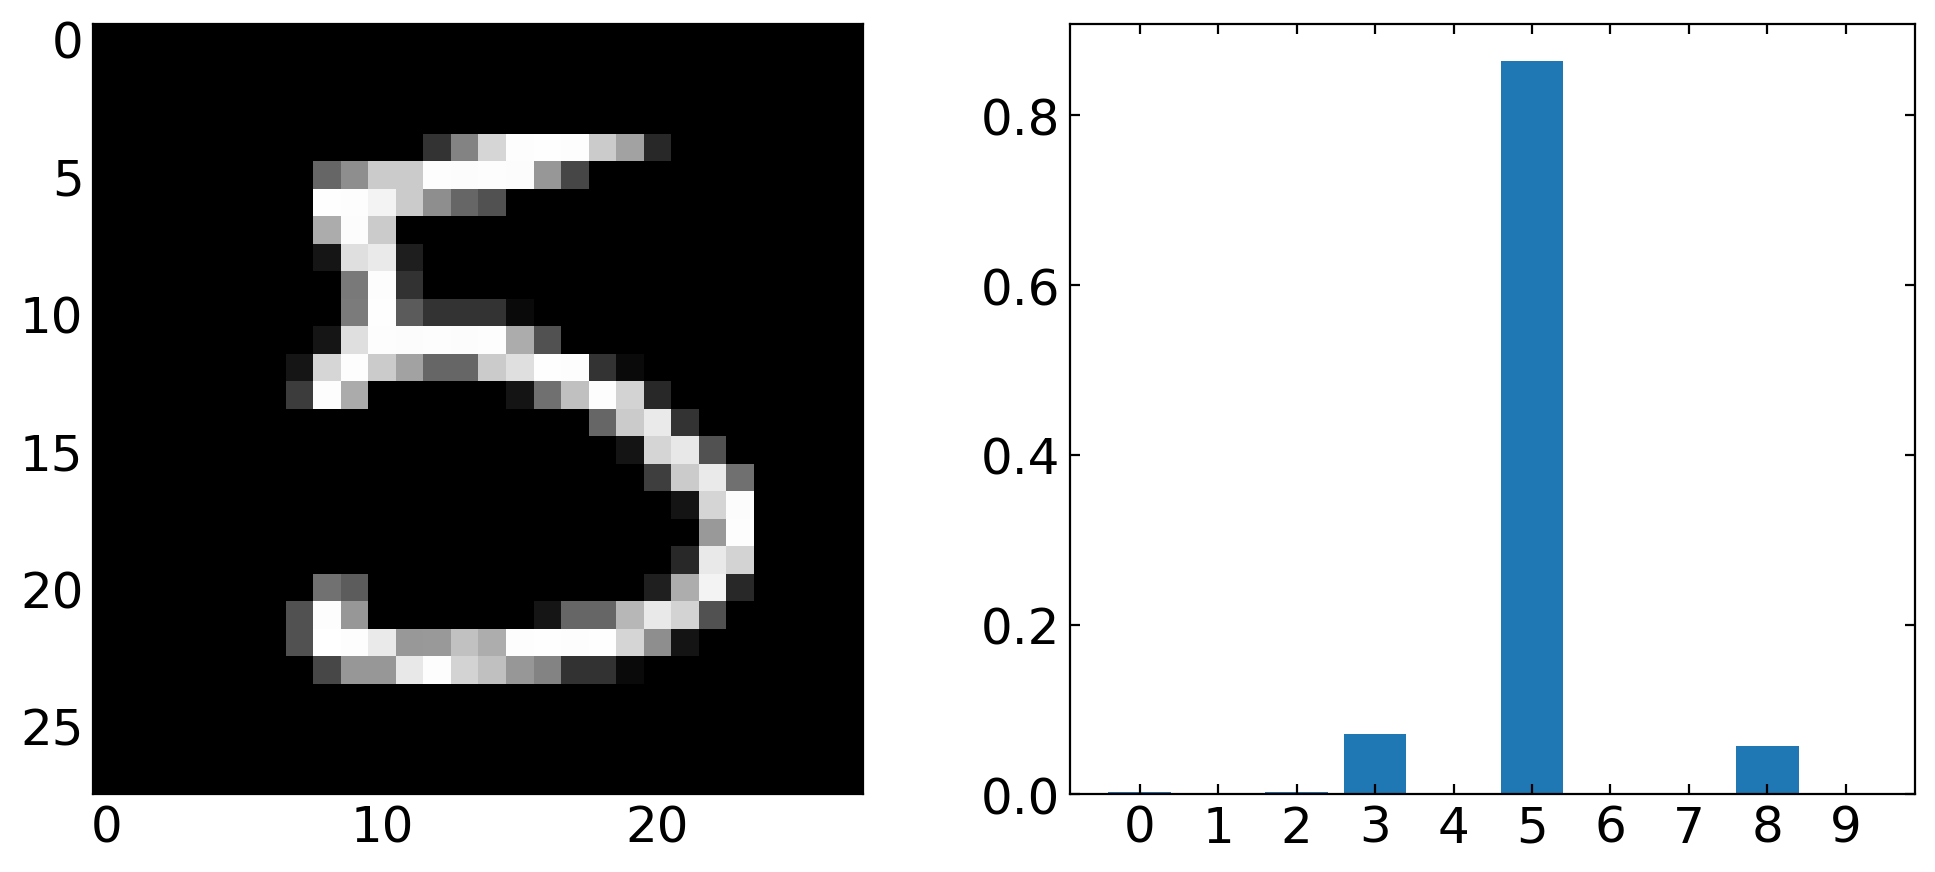

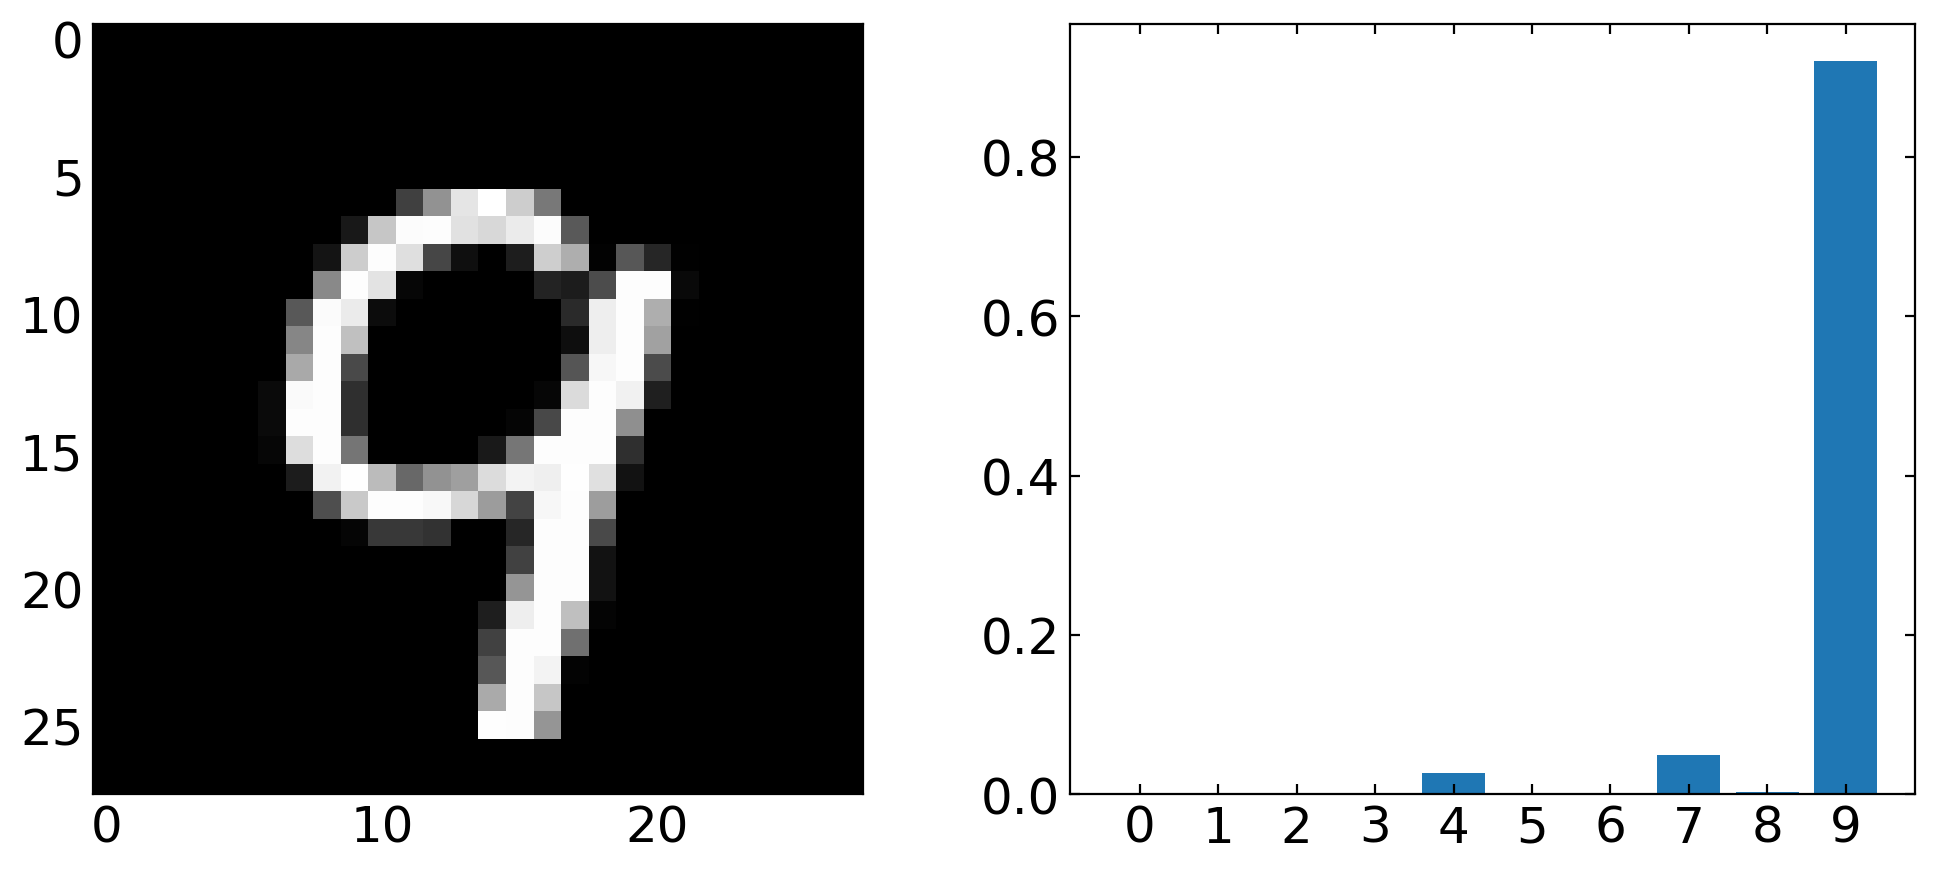

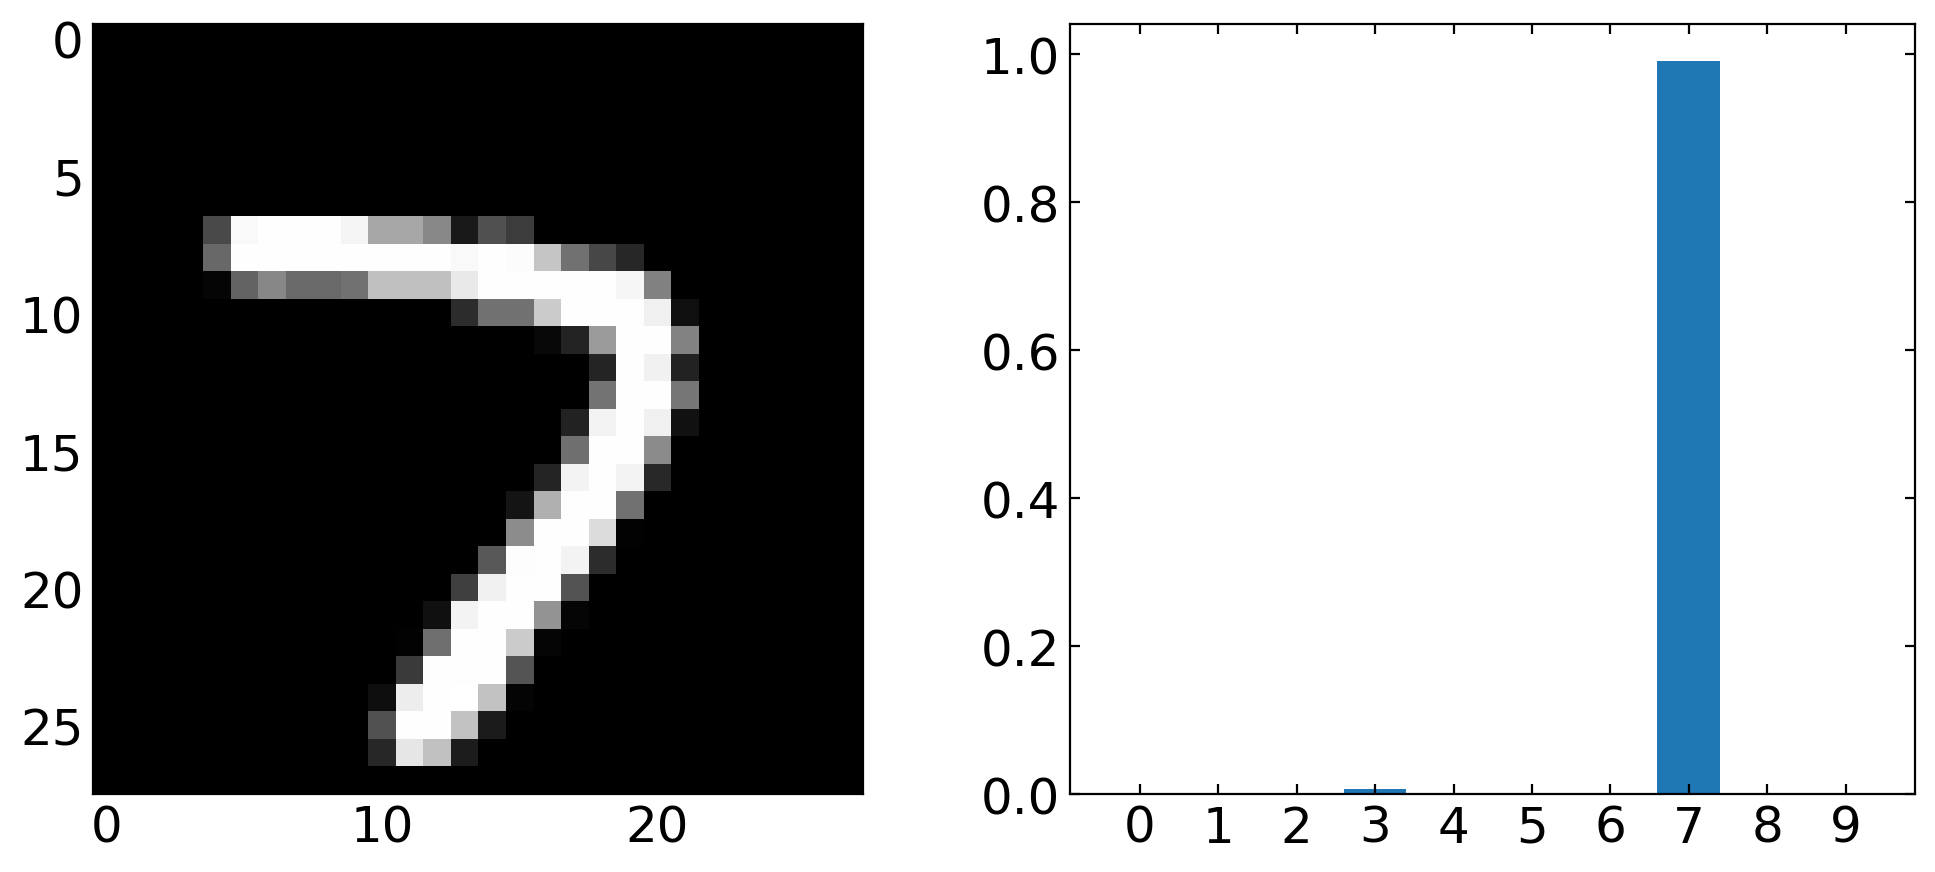

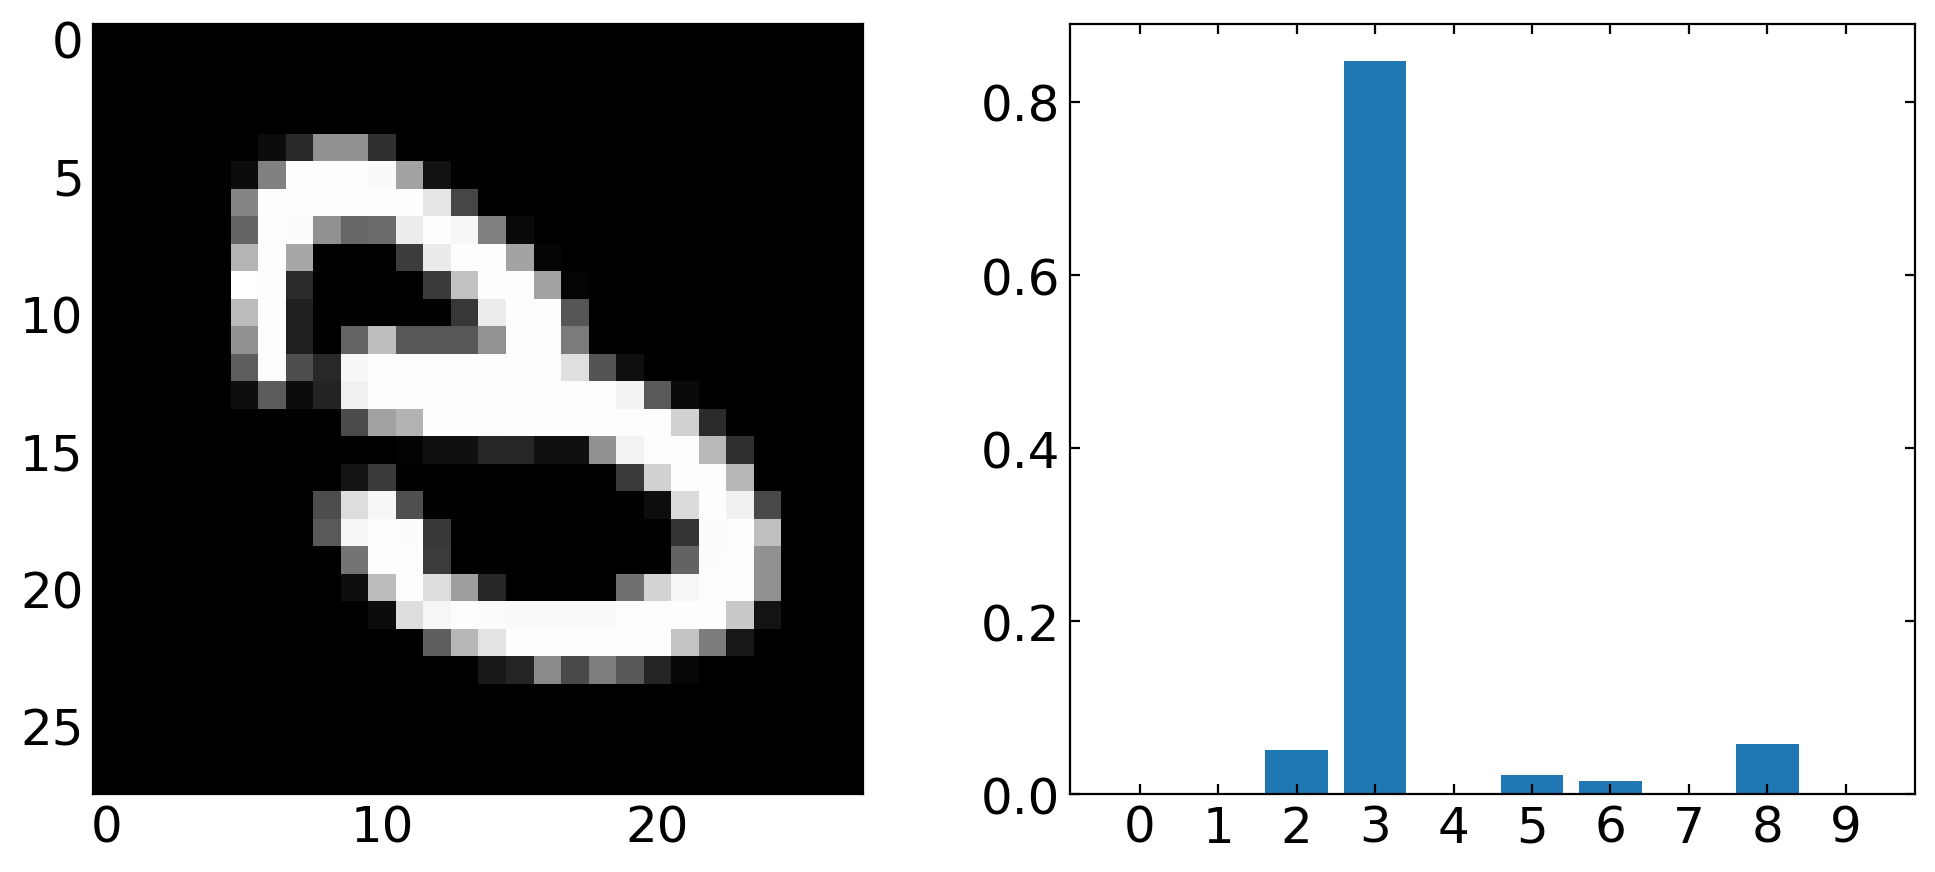

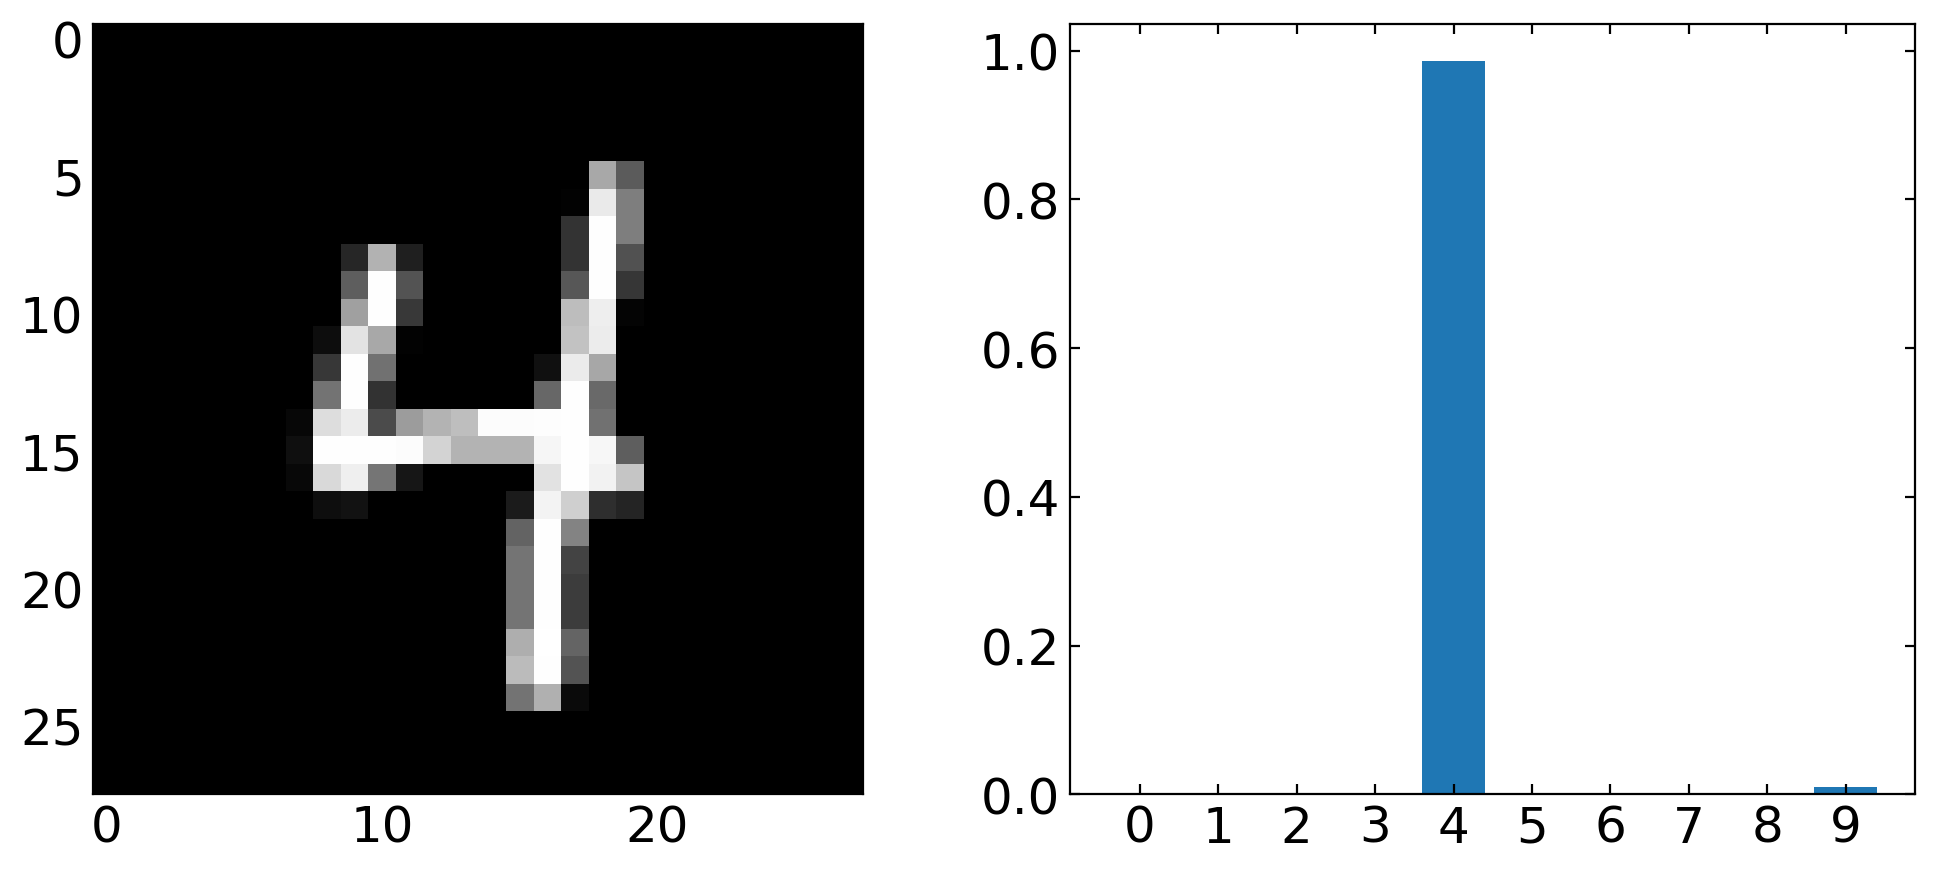

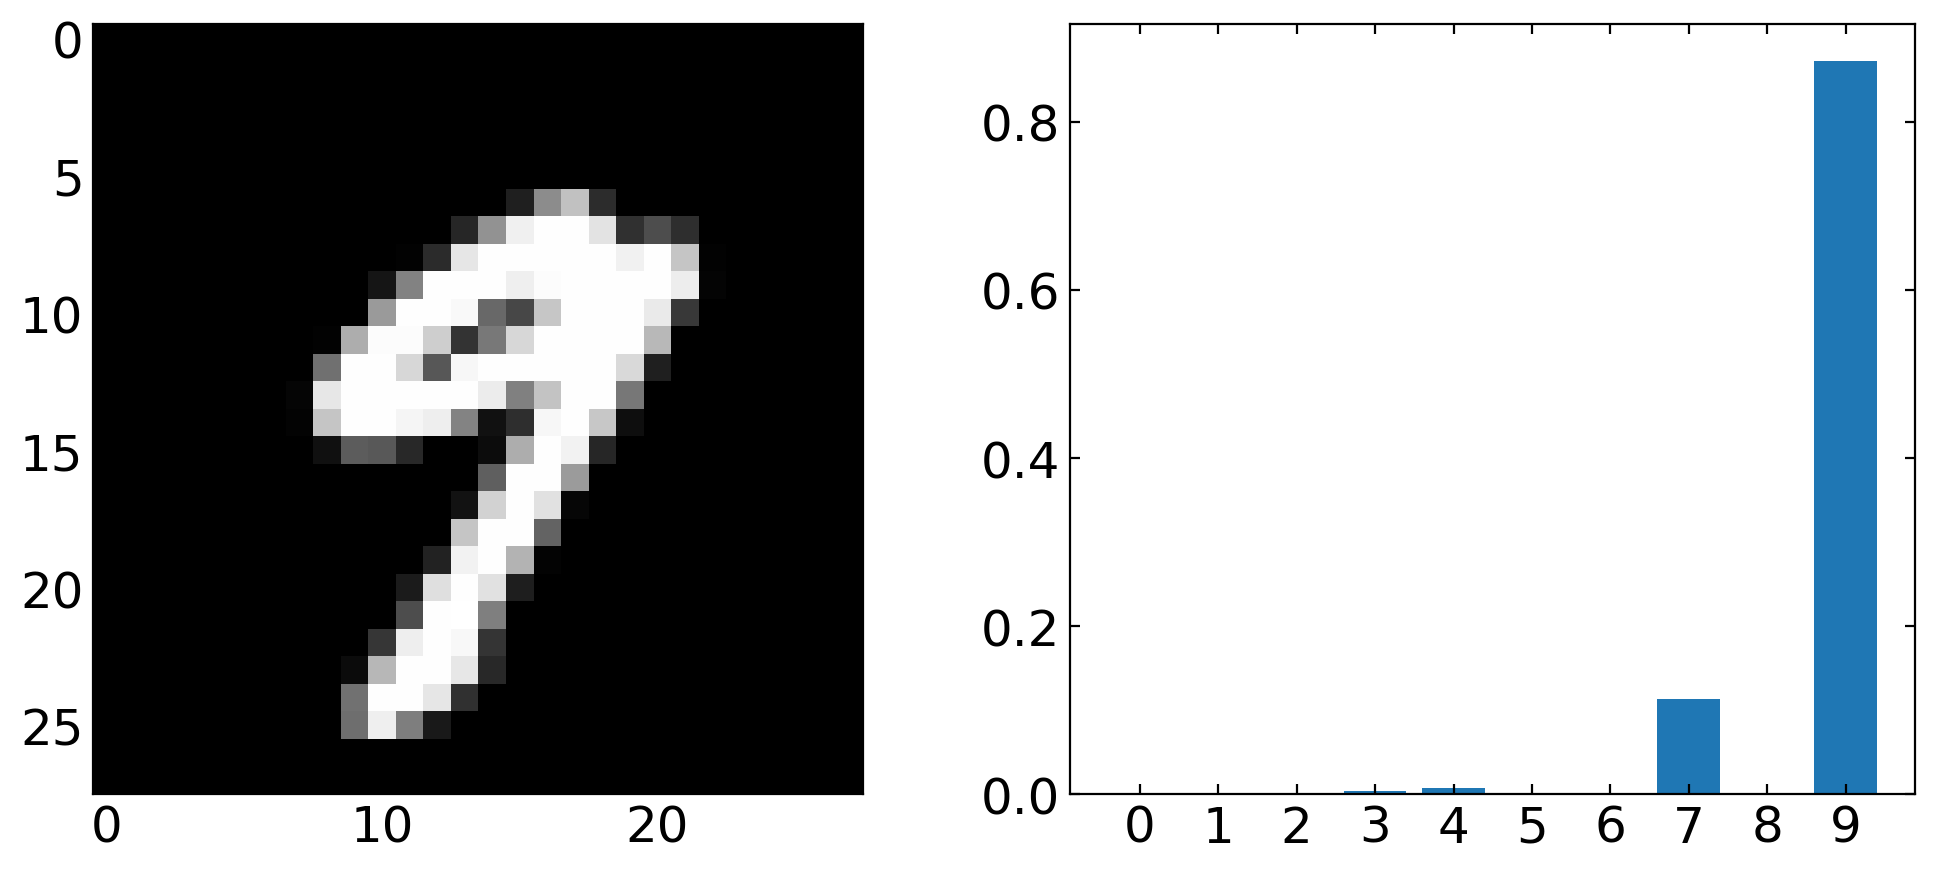

In [10]:
for i in range(15,21):
    fig,axs = plt.subplots(1,2,figsize=(12,5))
    
    student = x_test[i,:].reshape(28,28)
    
    axs[0].imshow(student, cmap='gray')
    axs[1].bar( list(range(0,10)), model.predict(student.reshape(1,784))[0])
    axs[1].set_xticks(list(range(0,10)))
    
    plt.show()

Testing with blended images

In [21]:
i=42

In [22]:
student=(x_test[i,:].reshape(28,28)+x_test[42,:].reshape(28,28)+x_test[3,:].reshape(28,28))/3

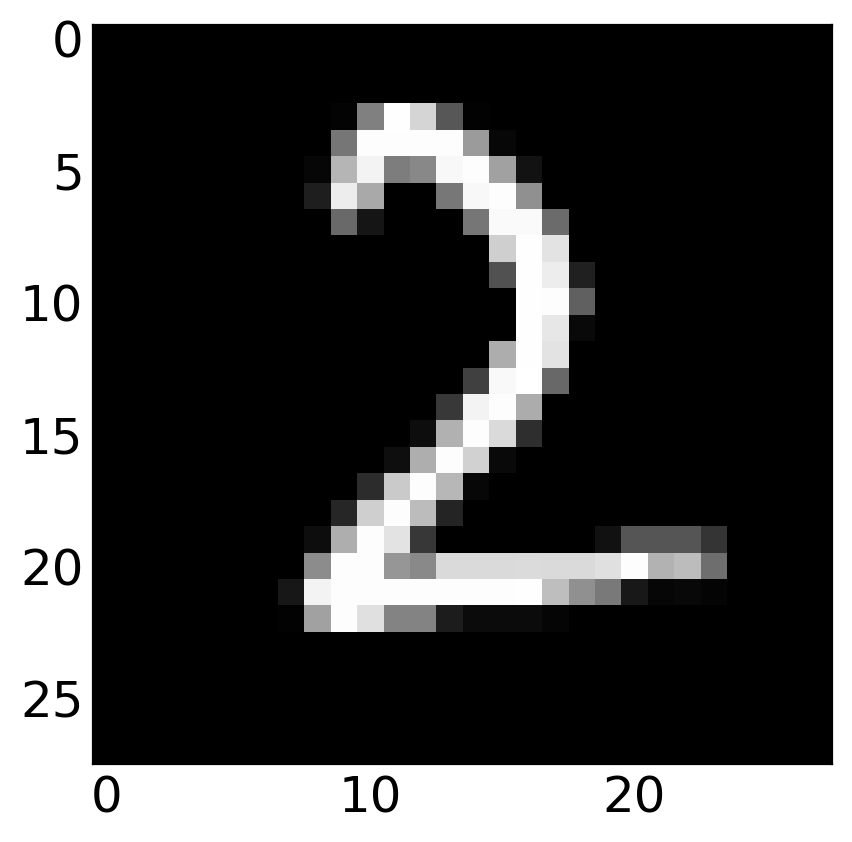

In [23]:
plt.imshow(x_test[512,:].reshape(28,28),cmap="gray")

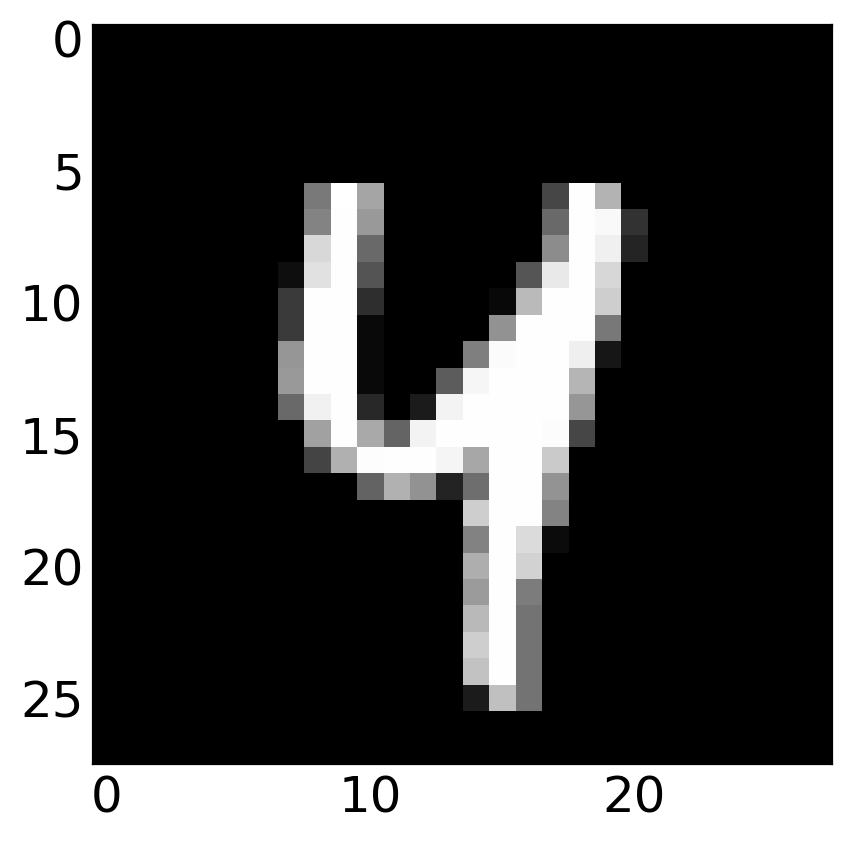

In [24]:
plt.imshow(x_test[42,:].reshape(28,28),cmap="gray")

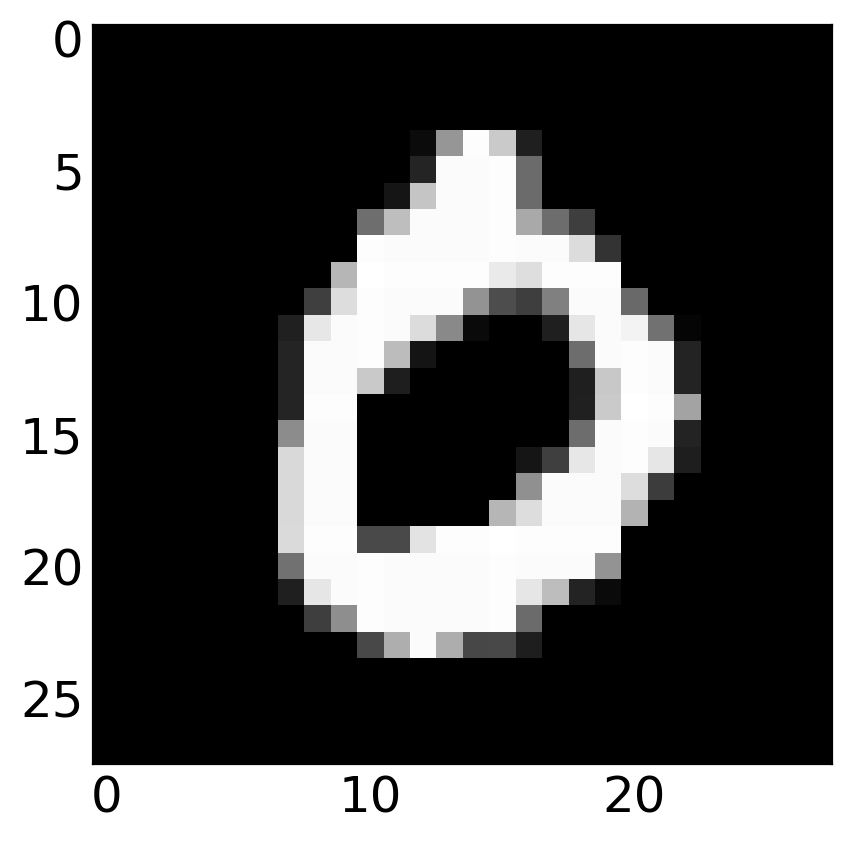

In [25]:
plt.imshow(x_test[3,:].reshape(28,28),cmap="gray")

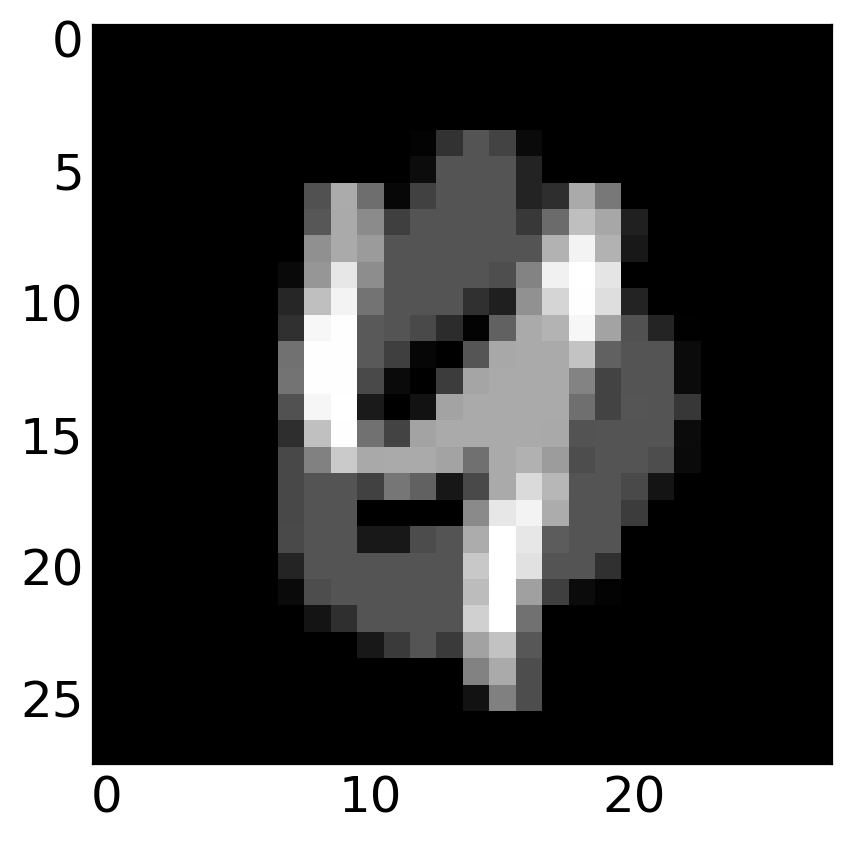

In [26]:
plt.imshow(student,cmap="gray")

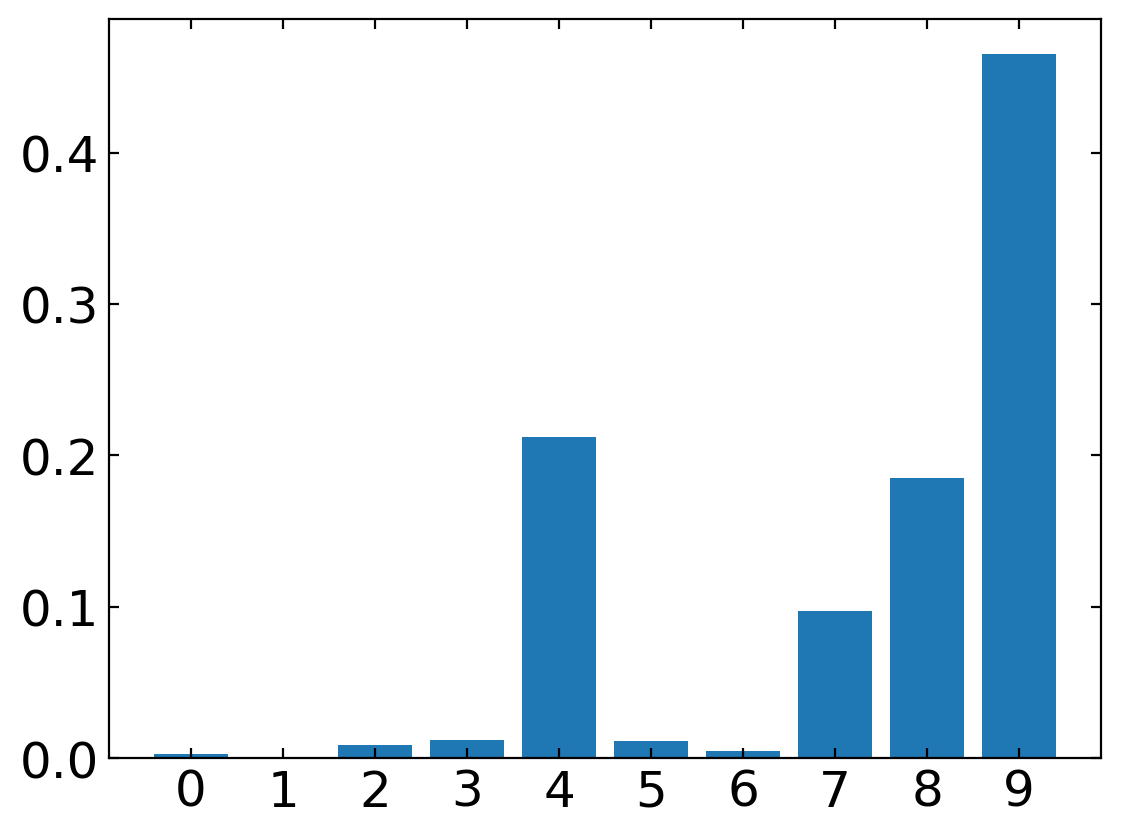

In [27]:
plt.bar( list(range(0,10)), model.predict(student.reshape(1,784))[0] )
plt.xticks( list(range(0,10)))
plt.show()

prediction:  9


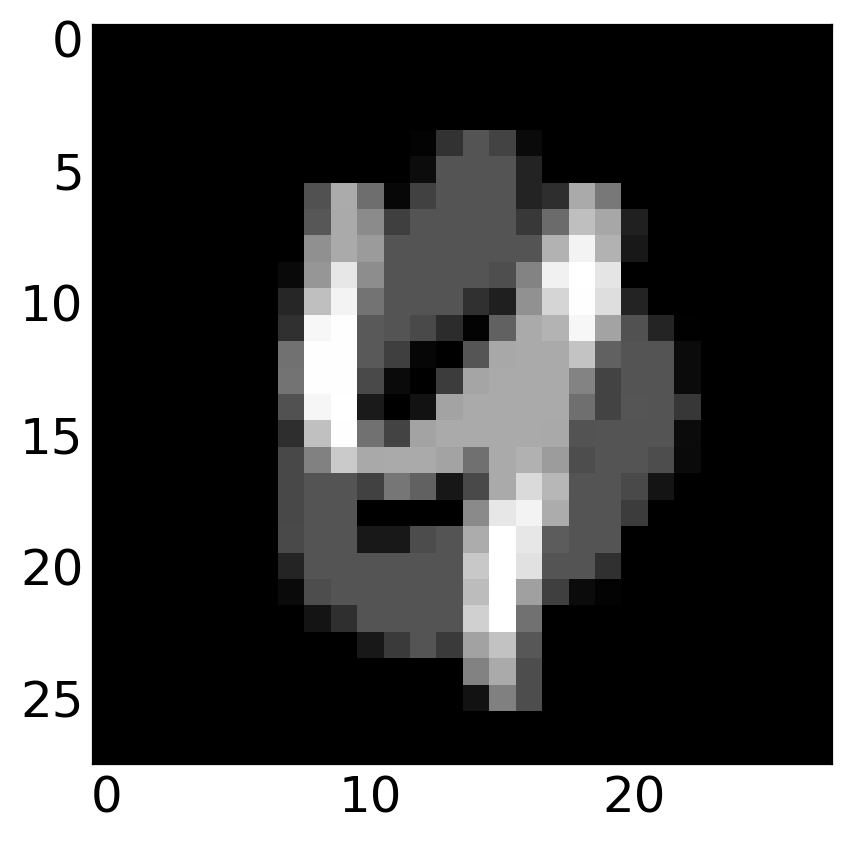

In [28]:
i=42
student=(x_test[i,:].reshape(28,28)+x_test[42,:].reshape(28,28)+x_test[3,:].reshape(28,28))/3
plt.imshow(student.reshape(28,28), cmap='gray')
print("prediction: ",np.argmax(model.predict(student.reshape(1,784))))

In [29]:
model.predict(student.reshape(1,784))

array([[0.00297183, 0.0006936 , 0.00873849, 0.01224055, 0.21193112,
        0.01138598, 0.00465778, 0.09701927, 0.18540345, 0.46495792]],
      dtype=float32)

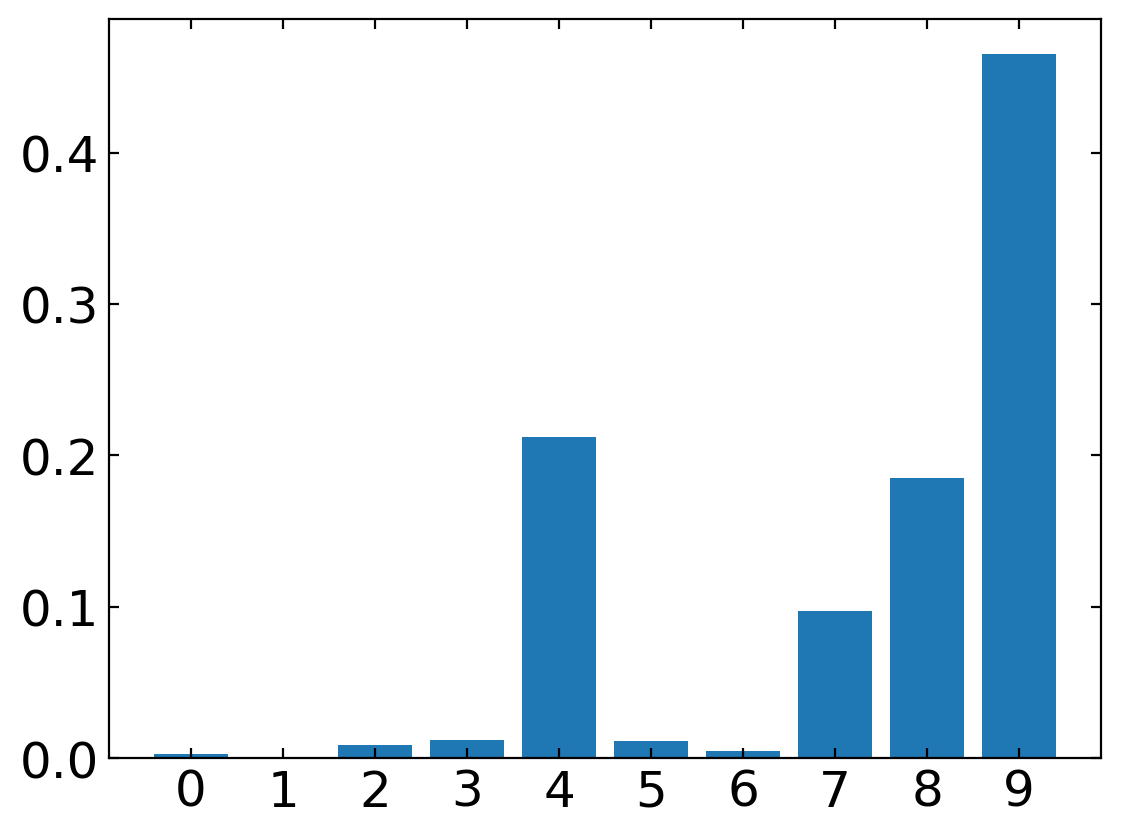

In [30]:
plt.bar( list(range(0,10)), model.predict(student.reshape(1,784))[0] )
plt.xticks( list(range(0,10)))
plt.show()